In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

In [45]:
#Input include: t - end_day; beta - rateSI ; gamma - rateIR
#We choose h = 1 => number of interation = (end_day / h) +1
#alpha = beta/N
class SIR:
    def __init__(self, end_day, Suspectible, Infectious, Recovered, rateSI, rateIR):
        self.h = 1
        self.eons = (end_day / self.h) + 1
        self.end_day = end_day 
        self.Suspectible = Suspectible
        self.Infectious = Infectious
        self.Recovered = Recovered
        self.rateSI = rateSI
        self.rateIR = rateIR
        self.numIndividuals = Suspectible + Infectious + Recovered
        self.results = None
        self.modelRun = False

    def run(self):
        Suspectible = [self.Suspectible]
        Infectious = [self.Infectious]
        Recovered = [self.Recovered]

        for step in range(1, self.eons):
            S_to_I = (self.rateSI * Suspectible[-1] * Infectious[-1]) / self.numIndividuals
            I_to_R = Infectious[-1] * self.rateIR
            if (Suspectible[-1] - self.h*S_to_I <0 ):
                Suspectible.append(0)
            else:
                Suspectible.append(Suspectible[-1] - self.h*S_to_I)
            Infectious.append(Infectious[-1] + self.h*(S_to_I - I_to_R))
            Recovered.append(Recovered[-1] + self.h*I_to_R)
        self.return_value = (Suspectible[-1],Infectious[-1], Recovered[-1])
        
        self.results = pd.DataFrame.from_dict({'Days':list(range(len(Suspectible))),
            'Suspectible':Suspectible, 'Infectious':Infectious, 'Recovered':Recovered},
            orient='index').transpose()
        self.modelRun = True
    
    def display(self):
        if self.modelRun == False:
            print('Error: Model has not run. Please call SIR.run()')
            return
        w = np.arange(0,self.eons).reshape(self.eons,1)
        s = np.array(self.results['Suspectible']).reshape(self.eons,1)
        i = np.array(self.results['Infectious']).reshape(self.eons,1)
        r = np.array(self.results['Recovered']).reshape(self.eons,1)
        print('...Day.......Suspectible.....Infectious...Recovered')
        print(np.concatenate((w,s,i,r),axis=1))

        

In [40]:
class RK4_SIR:
    # dt = 1
    def __init__(self, end_day, Suspectible, Infectious, Recovered, rateSI, rateIR):
        self.dt = 1
        self.eons = (end_day / self.dt) + 1
        self.end_day = end_day 
        self.Suspectible = Suspectible
        self.Infectious = Infectious
        self.Recovered = Recovered
        self.rateSI = rateSI
        self.rateIR = rateIR
        self.numIndividuals = Suspectible + Infectious + Recovered
        self.results = None
        self.modelRun = False
    def dSdt(self, S, I):
        return -self.rateSI*S*I/self.numIndividuals

    def dIdt(self, S, I):
        return self.rateSI*S*I/self.numIndividuals - self.rateIR*I

    def dRdt(self, I):
        return self.rateIR*I
    
    def calculate(self):
        Suspectible = [self.Suspectible]
        Infectious = [self.Infectious]
        Recovered = [self.Recovered]

        for i in range(1, self.eons):
            Si = Suspectible[-1]
            Ii = Infectious[-1]
        
            Sk1 = self.dSdt(Si, Ii)
            Ik1 = self.dIdt(Si, Ii)
            
            Sk2 = self.dSdt(Si + self.dt * Sk1/2 , Ii + self.dt * Ik1/2)
            Ik2 = self.dIdt(Si + self.dt * Sk1/2 , Ii + self.dt * Ik1/2)
            
            Sk3 = self.dSdt(Si + self.dt * Sk2/2 , Ii + self.dt * Ik2/2)
            Ik3 = self.dIdt(Si + self.dt * Sk2/2 , Ii + self.dt * Ik2/2)
           
            Sk4 = self.dSdt(Si + self.dt * Sk3, Ii + self.dt * Ik3)
            Ik4 = self.dIdt(Si + self.dt * Sk3, Ii + self.dt * Ik3)
           
            nextSi = Si + self.dt * (Sk1+2*Sk2+2*Sk3+Sk4)/6
            nextIi = Ii + self.dt * (Ik1+2*Ik2+2*Ik3+Ik4)/6
            nextRi = self.numIndividuals - nextSi - nextIi
            
            Suspectible.append(nextSi)
            Infectious.append(nextIi)
            Recovered.append(nextRi)
        
        self.return_value = (Suspectible[-1],Infectious[-1], Recovered[-1])
        
        self.results = pd.DataFrame.from_dict({'Days':list(range(len(Suspectible))),
            'Suspectible':Suspectible, 'Infectious':Infectious, 'Recovered':Recovered},
            orient='index').transpose()
        self.modelRun = True
        
    def display(self):
        if self.modelRun == False:
            print('Error: Model has not run. Please call SIR.run()')
            return
        w = np.arange(0,self.eons).reshape(self.eons,1)
        s = np.array(self.results['Suspectible']).reshape(self.eons,1)
        i = np.array(self.results['Infectious']).reshape(self.eons,1)
        r = np.array(self.results['Recovered']).reshape(self.eons,1)
        print('...Day.......Suspectible.....Infectious...Recovered')
        print(np.concatenate((w,s,i,r),axis=1))

    def plot(self):
        if self.modelRun == False:
            print('Error: Model has not run. Please call SIR.run()')
            return
        plt.plot(self.results['Days'], self.results['Suspectible'], color='blue')
        plt.plot(self.results['Days'], self.results['Infectious'], color='red')
        plt.plot(self.results['Days'], self.results['Recovered'], color='green')
        plt.xlabel('Days')
        plt.ylabel('Population')
        plt.legend(['Suspectible - RK4','Infectious - RK4','Recovered - RK4'], prop={'size': 10}, loc='upper right', fancybox=True, shadow=True)
        plt.suptitle(r'$\beta = {0}, \gamma = {1}$, day = {2}, S(t_0)= {3}, I(t_0) = {4}'.format(self.rateSI, self.rateIR, self.end_day, Suspectible, Infectious))
        plt.savefig('result.png')
        #plt.close()

In [89]:
end_day = int(input("Insert t: "))

Insert t: 180


In [90]:
rateSI = float(input("Insert beta: "))

Insert beta: 0.4


In [91]:
rateIR = float(input("Insert gamma: "))

Insert gamma: 0.25


In [92]:
Suspectible = int(input("Insert numbers of suspectible at t_0: "))

Insert numbers of suspectible at t_0: 87000000


In [93]:
Infectious = int(input("Insert numbers of infectious at t_0: "))

Insert numbers of infectious at t_0: 2000


In [94]:
m1 = SIR(end_day, Suspectible, Infectious, 0, rateSI, rateIR)

In [95]:
m2 = RK4_SIR(end_day, Suspectible, Infectious, 0, rateSI, rateIR)

In [96]:
m1.run()
m2.calculate()

m1.plot()
m2.plot()

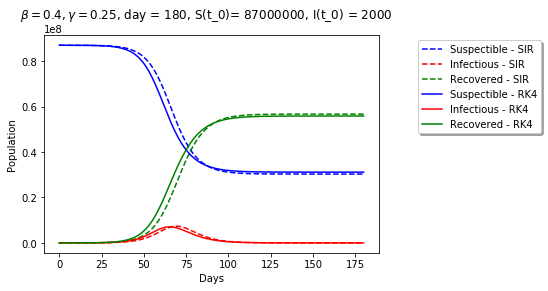

In [97]:
plt.plot(m1.results['Days'], m1.results['Suspectible'], '--', color='blue', label = 'S-SIR')
plt.plot(m1.results['Days'], m1.results['Infectious'], '--', color='red', label = 'I-SIR')
plt.plot(m1.results['Days'], m1.results['Recovered'], '--', color='green', label = 'R-SIR')

plt.plot(m2.results['Days'], m2.results['Suspectible'], color='blue', label = 'S-RK4' )
plt.plot(m2.results['Days'], m2.results['Infectious'], color='red', label = 'I-RK4')
plt.plot(m2.results['Days'], m2.results['Recovered'], color='green', label = 'R-SIR')

plt.legend(['Suspectible - SIR', 'Infectious - SIR', 'Recovered - SIR', 'Suspectible - RK4','Infectious - RK4','Recovered - RK4'], prop={'size': 10}, loc='upper right', fancybox=True, shadow=True, bbox_to_anchor=(1.5, 1))

plt.xlabel('Days')
plt.ylabel('Population')

plt.suptitle(r'$\beta = {0}, \gamma = {1}$, day = {2}, S(t_0)= {3}, I(t_0) = {4}'.format(m1.rateSI, m1.rateIR, m1.end_day, Suspectible, Infectious))
plt.savefig('result.png')
